### Olympics Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
# lOAD DATASET(ATHLETES EVENTS AS DATA)
data =pd.read_csv('athlete_events.csv')

In [14]:
data.shape

(271116, 19)

In [4]:
regions_data = pd.read_csv('noc_regions.csv')

In [15]:
data.head(4)
# data.shape

(271116, 19)

In [8]:
regions_data.head(2)
# regions_data.shape
# HERE NOC IS NATIONAL OLYMPIC COMMUNITY

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles


### jOIN THE DATAFRAME(COMBINE DATASET WITH PANDAS MERGE FUNCTION)

In [12]:
data_region =data.merge(regions_data,how ='left',on='NOC')
data_region.head(3)
 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,region_x,notes_x,region_y,notes_y,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,China,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,China,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,...,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,Denmark,NaN,Denmark,NaN


In [13]:
data_region.shape

(271116, 21)

In [ ]:
# Colum name conssitent

In [16]:
data_region.rename(columns={'region':'Region','notes':'Notes'},inplace=True)

In [17]:
data_region.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,region_x,notes_x,region_y,notes_y,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,China,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,China,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,...,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,Denmark,NaN,Denmark,NaN


#### To delete or drop colum name region x

data_region.drop('region_x',axis=1,inplace=True)

In [32]:
data_region.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


#### To delete or drop multiple unnneceassary colum at once

In [27]:
to_delete =['notes_x','region_y','notes_y']
data_region.drop(columns=to_delete,inplace=True)

In [31]:
## Now check
data_region
data_region.shape


(271116, 17)

In [33]:
data_region.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


### Check null values

In [36]:
null_value=data_region.isna()
null_value.any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [37]:
 data_region.isnull().sum()
    ## to find how many null values are there

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

#### Columns name contains null values oe missing values in the form of list

In [40]:
colum_null_values= data_region.columns[data_region.isnull().any()].tolist()
print(colum_null_values)

['Age', 'Height', 'Weight', 'Medal', 'Region', 'Notes']


In [ ]:
## India details

In [47]:
India_data =data_region.query('Team=="India" ').head(8)
India_data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN
898,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
899,512,Shiny Kurisingal Abraham-Wilson,F,27.0,167.0,53.0,India,IND,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Women's 800 metres,NaN,India,NaN
900,512,Shiny Kurisingal Abraham-Wilson,F,31.0,167.0,53.0,India,IND,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN


In [ ]:
### Japan data

In [49]:
data_region.query('Team =="Japan"')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
625,362,Isao Ko Abe,M,24.0,177.0,75.0,Japan,JPN,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Hammer Throw,NaN,Japan,NaN
629,363,Kazumi Abe,M,28.0,178.0,67.0,Japan,JPN,1976 Winter,1976,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,NaN,Japan,NaN
630,364,Kazuo Abe,M,25.0,166.0,69.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Lightweight, Freestyle",NaN,Japan,NaN
631,365,Kinya Abe,M,23.0,168.0,68.0,Japan,JPN,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Foil, Individual",NaN,Japan,NaN
632,366,Kiyoshi Abe,M,25.0,167.0,62.0,Japan,JPN,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,Japan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266953,133565,Tsuneya Yuzaki,M,19.0,174.0,67.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Hockey,Hockey Men's Hockey,NaN,Japan,NaN
266954,133565,Tsuneya Yuzaki,M,23.0,174.0,67.0,Japan,JPN,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,NaN,Japan,NaN
266955,133565,Tsuneya Yuzaki,M,27.0,174.0,67.0,Japan,JPN,1968 Summer,1968,Summer,Mexico City,Hockey,Hockey Men's Hockey,NaN,Japan,NaN
266957,133566,Ryo Yuzawa,M,27.0,175.0,76.0,Japan,JPN,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Men's Singles,NaN,Japan,NaN


#### Top country participating

In [63]:
top_10countries = data_region.Team.value_counts().sort_values(ascending=False).head(10)
top_10countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

#### Plot for top 10 countries

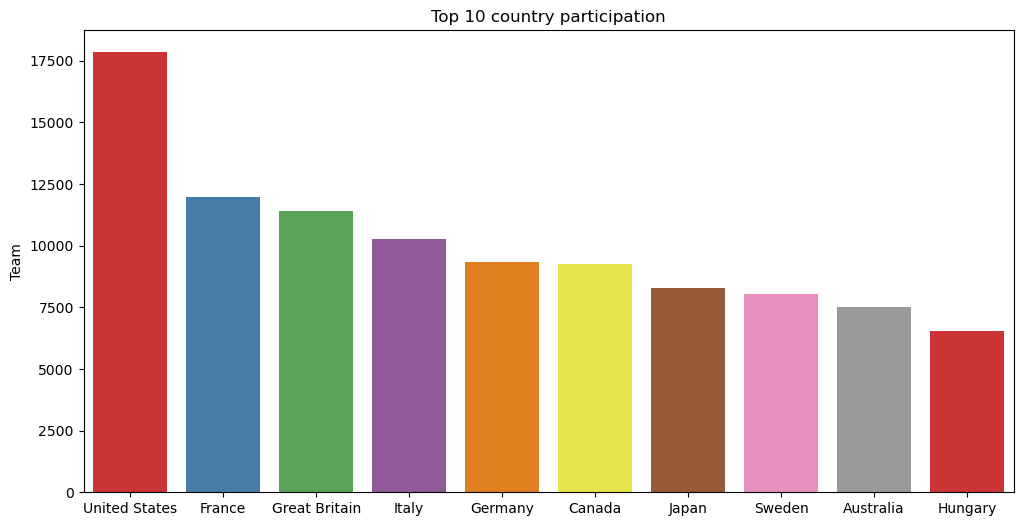

In [68]:
plt.figure(figsize=(12,6))
plt.title("Top 10 country participation")
sns.barplot(x=top_10countries.index,y=top_10countries,palette='Set1');

#### Age distribution of the participations

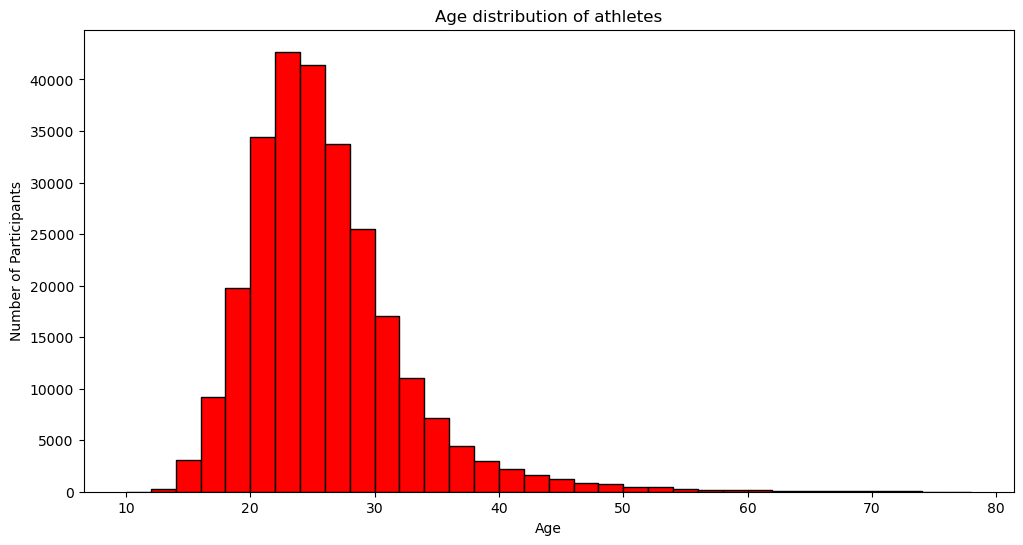

In [72]:
plt.figure(figsize=(12,6))
plt.title("Age distribution of athletes")
plt.xlabel("Age")
plt.ylabel("Number of Participants")
plt.hist(data_region.Age , bins=np.arange(10,80,2),color='red',edgecolor='black')
plt.show()

In [74]:
winter_sports =data_region[data_region.Season=='Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

#### summer olympics sports

In [75]:
summer_sports =data_region[data_region.Season=='Summer'].Sport.unique()
summer_sports


array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

#### Male and female participants

In [77]:
gender_counts =data_region.Sex.value_counts()
gender_counts


M    196594
F     74522
Name: Sex, dtype: int64

#### pie plot for male and female athletics


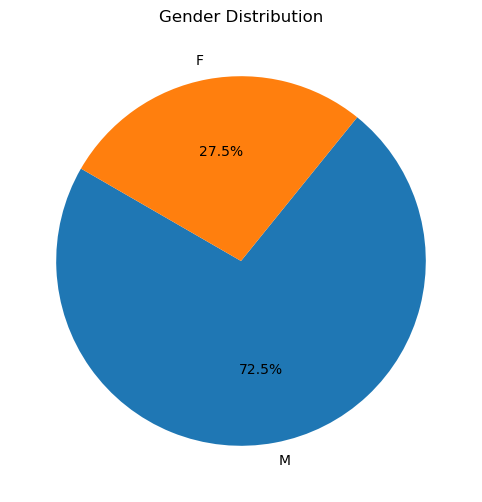

In [87]:
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',startangle=150)
plt.show()

### Total Medals

In [88]:
data_region.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

#### Total no of female athletics in each olympics

In [ ]:
female_participating

In [92]:
Women_Olympics =data_region[(data_region=='F')&(data_region=="Summer")]
Women_Olympics

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
